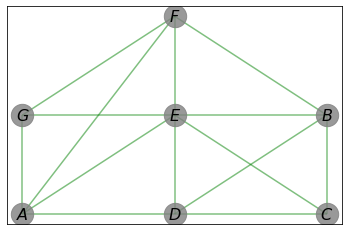

In [1]:
from helpers import samples
sample  = samples.at1q3()
sample.Get_Networkx_Graph()
sample.Draw_Networkx_Graph()

In [2]:
import networkx as nx
from networkx.algorithms import centrality

import pandas as pd

## degree centrality 

degree centrality is the degree of the node 

normalised by (n - 1)

In [3]:
n_nodes = len(sample.G.nodes)
degree_centrality = [{'node': n, 'degree': nx.degree(sample.G, n), 'normalised': nx.degree(sample.G,n)/(n_nodes-1)} for n in sample.G.nodes]


pd.DataFrame(degree_centrality)

,node,degree,normalised
0,A,4,0.666667
1,B,4,0.666667
2,C,3,0.500000
3,D,4,0.666667
4,E,6,1.000000
5,F,4,0.666667
6,G,3,0.500000


In [4]:
centrality.degree_centrality(sample.G)

{'A': 0.6666666666666666,
 'B': 0.6666666666666666,
 'C': 0.5,
 'D': 0.6666666666666666,
 'E': 1.0,
 'F': 0.6666666666666666,
 'G': 0.5}

## closeness centrality

Inverse of sum of shortest paths to the node

the smaller the shortest paths the higher the closeness of the nodes to others in the graph

closness  = (sum(shortest path length)) /  (n-1)) to the power -1


In [5]:
nodes = list(sample.G.nodes) 
# for each node, find all the shortest paths to the node from all other nodes, then add up the lengths of these shortest paths 

shortest_paths_dict = {}
for s in nodes: 
    s_shortest_path_lengths = []
    for t in nodes: 
        # if s == t: 
        #     continue
        print(nx.shortest_path_length(sample.G, s, t), list(nx.shortest_path(sample.G, s, t)))
        s_shortest_path_lengths.append(nx.shortest_path_length(sample.G, s, t))
    shortest_paths_dict[s]  = s_shortest_path_lengths

closness_df = pd.DataFrame.from_dict(shortest_paths_dict, orient='index', columns=list(shortest_paths_dict.keys()))
# closness_df.index.set_names('n', inplace=True)
closness_df['sum_shortest_path_lengths'] = closness_df.apply(lambda row: sum(row[0:]), axis=1)
n = len(nodes)
closness_df['closeness'] = (closness_df['sum_shortest_path_lengths'] / (n-1)) ** -1



0 ['A']
2 ['A', 'F', 'B']
2 ['A', 'E', 'C']
1 ['A', 'D']
1 ['A', 'E']
1 ['A', 'F']
1 ['A', 'G']
2 ['B', 'F', 'A']
0 ['B']
1 ['B', 'C']
1 ['B', 'D']
1 ['B', 'E']
1 ['B', 'F']
2 ['B', 'E', 'G']
2 ['C', 'E', 'A']
1 ['C', 'B']
0 ['C']
1 ['C', 'D']
1 ['C', 'E']
2 ['C', 'B', 'F']
2 ['C', 'E', 'G']
1 ['D', 'A']
1 ['D', 'B']
1 ['D', 'C']
0 ['D']
1 ['D', 'E']
2 ['D', 'A', 'F']
2 ['D', 'A', 'G']
1 ['E', 'A']
1 ['E', 'B']
1 ['E', 'C']
1 ['E', 'D']
0 ['E']
1 ['E', 'F']
1 ['E', 'G']
1 ['F', 'A']
1 ['F', 'B']
2 ['F', 'B', 'C']
2 ['F', 'A', 'D']
1 ['F', 'E']
0 ['F']
1 ['F', 'G']
1 ['G', 'A']
2 ['G', 'F', 'B']
2 ['G', 'E', 'C']
2 ['G', 'A', 'D']
1 ['G', 'E']
1 ['G', 'F']
0 ['G']


In [6]:
closness_df

,A,B,C,D,E,F,G,sum_shortest_path_lengths,closeness
A,0,2,2,1,1,1,1,8,0.750000
B,2,0,1,1,1,1,2,8,0.750000
C,2,1,0,1,1,2,2,9,0.666667
D,1,1,1,0,1,2,2,8,0.750000
E,1,1,1,1,0,1,1,6,1.000000
F,1,1,2,2,1,0,1,8,0.750000
G,1,2,2,2,1,1,0,9,0.666667


In [7]:
centrality.closeness_centrality(sample.G)

{'A': 0.75,
 'B': 0.75,
 'C': 0.6666666666666666,
 'D': 0.75,
 'E': 1.0,
 'F': 0.75,
 'G': 0.6666666666666666}

## betweenness centrality 

betweenness is a measure of shortests paths that run through a node, the higher the shortest paths that run through the node that more betweenness this node has in the network

to find betweenness we need to calculate the total number of shortest paths between two ends which node in question is on the path, divided by the total number of shortest paths between the two ends. 

algo for the calculation: 

to calculate betweeness for node in question N: 

```
for each node in the graph: 

    mark as a start node s
    
    find all shortest path between this node and all other nodes: 
    for each other node in the network: 
        mark as a terminal node t to shortest path 
        find and count all shortest paths between start and terminal  -> number of shortest paths between s and t
        if node N in question is on the path, increment the relative count for number of paths this N lies on  
        -> number of shortest paths between s and t that N is on
        ensure that N is not s or t in this iteration (this also exclude shortest paths to self)

        this iteration betweeness measure is: 
            number of shortest paths between s and t that N is on / number of shortest paths between s and t
        add iteration betweeness measure to overall betweeness of N 

        loop, make sure that you dont double count shortest paths, do so by removing any start node that is already processsed 
```



In [8]:
[p for p in nx.all_shortest_paths(sample.G, 'A', 'B')]

[['A', 'F', 'B'], ['A', 'E', 'B'], ['A', 'D', 'B']]

In [9]:
nodes = sorted(set(sample.G.nodes))

In [10]:
shortest_paths = {}
nodes1 = nodes.copy()
CBE = 0
CBF = 0
for s in nodes: 
    nodes1.remove(s)
    # print(s)
    # print(nodes1)
    for t in nodes1: 
        gjk = [g for g in nx.all_shortest_paths(sample.G, s, t)]
        print(s, t, gjk, len(gjk),  sum(['E' in p for p in gjk]), sum(['F' in p for p in gjk]), 'before')
        gEjk = sum(['E' in p if (t != 'E' and s != 'E') else 0 for p in gjk])
        gFjk = sum(['F' in p if (t != 'F' and s != 'F') else 0 for p in gjk])
        # adjusted means that path is not counted if node in question is an end point in path 
        print(s, t, gjk, len(gjk),  gEjk, gFjk, 'adjusted')
        CBE = CBE + (gEjk/len(gjk))
        CBF = CBF + (gFjk/len(gjk))
        print('cumulative betweenness for E and F:','%.2f'%CBE, '%.2f'%CBF)



A B [['A', 'F', 'B'], ['A', 'E', 'B'], ['A', 'D', 'B']] 3 1 1 before
A B [['A', 'F', 'B'], ['A', 'E', 'B'], ['A', 'D', 'B']] 3 1 1 adjusted
cumulative betweenness for E and F: 0.33 0.33
A C [['A', 'E', 'C'], ['A', 'D', 'C']] 2 1 0 before
A C [['A', 'E', 'C'], ['A', 'D', 'C']] 2 1 0 adjusted
cumulative betweenness for E and F: 0.83 0.33
A D [['A', 'D']] 1 0 0 before
A D [['A', 'D']] 1 0 0 adjusted
cumulative betweenness for E and F: 0.83 0.33
A E [['A', 'E']] 1 1 0 before
A E [['A', 'E']] 1 0 0 adjusted
cumulative betweenness for E and F: 0.83 0.33
A F [['A', 'F']] 1 0 1 before
A F [['A', 'F']] 1 0 0 adjusted
cumulative betweenness for E and F: 0.83 0.33
A G [['A', 'G']] 1 0 0 before
A G [['A', 'G']] 1 0 0 adjusted
cumulative betweenness for E and F: 0.83 0.33
B C [['B', 'C']] 1 0 0 before
B C [['B', 'C']] 1 0 0 adjusted
cumulative betweenness for E and F: 0.83 0.33
B D [['B', 'D']] 1 0 0 before
B D [['B', 'D']] 1 0 0 adjusted
cumulative betweenness for E and F: 0.83 0.33
B E [['B', 'E'

In [11]:
n = len(nodes)
normalisation_factor = (n-2)*(n-1)/2
print('final Cb(E)',f'{CBE:.2f}', f'{(CBE/normalisation_factor):.4f}')
print('final Cb(F)',f'{CBF:.2f}', f'{(CBF/normalisation_factor):.4f}') 

final Cb(E) 3.67 0.2444
final Cb(F) 0.83 0.0556


In [12]:
nx.betweenness_centrality(sample.G,normalized=False)

{'A': 0.8333333333333333,
 'B': 0.8333333333333333,
 'C': 0.0,
 'D': 0.8333333333333333,
 'E': 3.6666666666666665,
 'F': 0.8333333333333333,
 'G': 0.0}

In [13]:
nx.betweenness_centrality(sample.G,normalized=True)

{'A': 0.05555555555555555,
 'B': 0.05555555555555555,
 'C': 0.0,
 'D': 0.05555555555555555,
 'E': 0.24444444444444444,
 'F': 0.05555555555555555,
 'G': 0.0}